1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

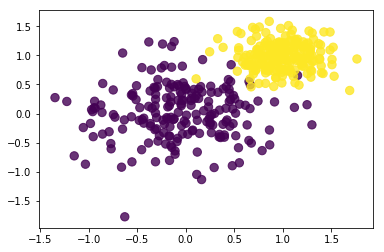

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
Image('two_categories_scatter_plot.png')

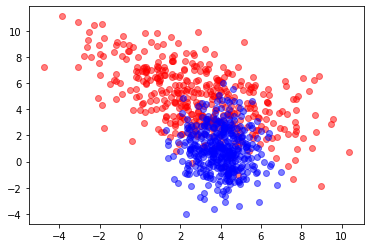

In [2]:
mean, cov = [3, 5], [(7, -3), (-3, 5)]
data = np.random.multivariate_normal(mean, cov, 400)
df = pd.DataFrame(data, columns=["x", "y"])

fig, ax = plt.subplots()
ax.scatter(x="x", y="y", data=df, marker='o', c='r', alpha=0.5)

mean, cov = [4,1], [(1, 0), (0, 3)]
data = np.random.multivariate_normal(mean, cov, 400)
df = pd.DataFrame(data, columns=["x", "y"])
ax.scatter(x="x", y="y", data=df, marker='o', c='b', alpha=0.5)
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

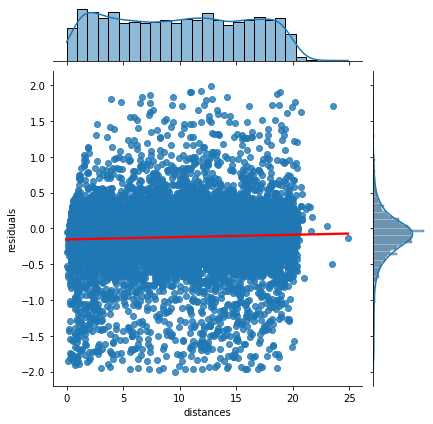

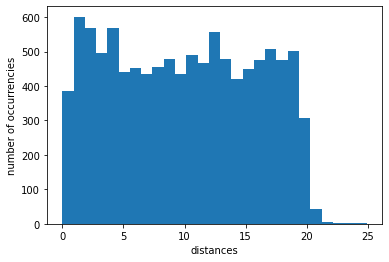

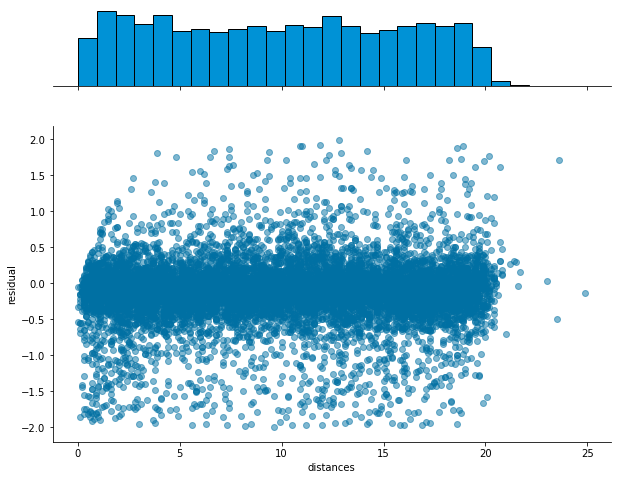

In [3]:
import pickle
filename = 'data/residuals_261.pkl'

# INSPECT
s = open(filename, 'rb')
new_dict = pickle.load(s)
s.close()
#print(new_dict)

# DATAFRAME
a = np.load(filename, allow_pickle=True).item()
df = pd.DataFrame(a)
#display(df)

# CLEANING
df = df[df['residuals'].abs() < 2]
#display(df)

# SEABORN
sns.jointplot(x="distances", y="residuals", data=df,kind="reg", line_kws={"color": "red"})

# PROFILE
fig, ax = plt.subplots()
y, bins, _ = plt.hist(df['distances'], bins='auto')
ax.set_xlabel('distances')
ax.set_ylabel('number of occurrencies')
x = np.zeros(bins.size - 1)
err_y = np.zeros(bins.size - 1)
for i in range(bins.size - 1):
    x[i] = (bins[i]+bins[i+1])/2
    residual_serie = df[(df['distances']>= bins[i]) & (df['distances']<bins[i+1])]['residuals']
    err_y[i] = residual_serie.std()

# PROFILE OVER SCATTER
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8), gridspec_kw={'height_ratios': [1, 4]})
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.set_yticks([])
ax1.get_xaxis().set_ticklabels([])
ax2.scatter(x="distances", y="residuals", data=df, marker='o',c='#0070a3', alpha=0.5)
ax2.set_xlabel('distances')
ax2.set_ylabel('residual')
ax1.hist(df['distances'], bins='auto',edgecolor='black', color='#0092d6')
plt.show()


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


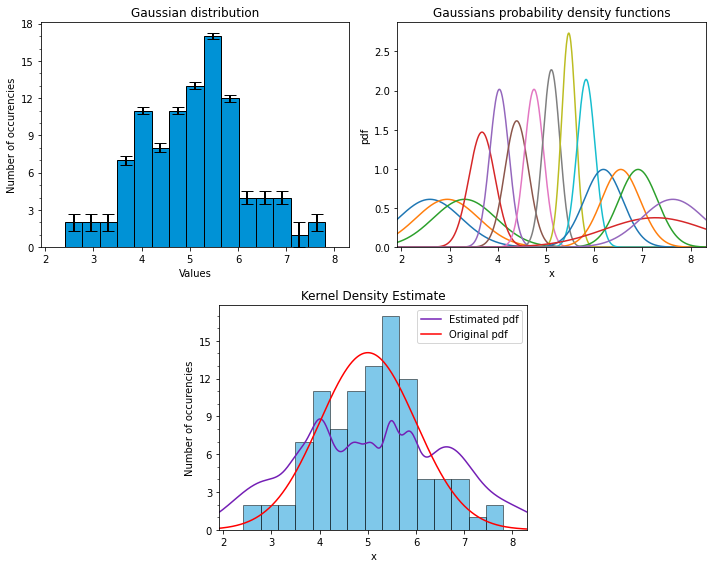

In [4]:
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy import integrate
mean = 5
std = 1

gridsize = (4,4)
nrnd = np.random.normal(loc=mean, scale=std, size=(100,))
fig = plt.figure(figsize=(10,8))
ax = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
gax = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=2)
y, binEdges, _ = ax.hist(nrnd, bins=15,edgecolor='black', color='#0092d6')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
yerr= 1/np.sqrt(y)
ax.errorbar(bincenters, y, yerr, fmt='none',c='black', linewidth=2, capsize=6)
ax.set_xlabel('Values')
ax.set_ylabel('Number of occurencies')
ax.set_title('Gaussian distribution')
ax.yaxis.set_major_locator(MultipleLocator(3.00000))
ax.yaxis.set_minor_locator(MultipleLocator(1.00000))
ax.set(xlim=(binEdges[0]-std/2, binEdges[15]+std/2))
norm_arr = np.array([norm(loc=bincenters[x], scale=1.06*yerr[x]*(y[x]**(-0.2))) for x in range(bincenters.size)])
norm_values = np.empty((0,1000), np.float64)
for norm_ in norm_arr:
    x = np.linspace(0, 10, 1000)
    norm_pdf = norm_.pdf(x)
    norm_values=np.vstack((norm_values, norm_pdf ))
    gax.plot(x, norm_pdf)
gax.set(xlim=(binEdges[0]-std/2, binEdges[15]+std/2))
gax.set(ylim=(0, None))
gax.set_xlabel('x')
gax.set_ylabel('pdf')
gax.set_title('Gaussians probability density functions')

ax = plt.subplot2grid(gridsize, (2, 1) , colspan=2, rowspan=2)
g = norm_values.sum(axis=0)
x = np.linspace(0, 10, 1000)
ax.hist(nrnd, bins=15,edgecolor='black', color='#0092d6', alpha=0.5)
hist_area = integrate.trapz(y, bincenters)
g_area = integrate.trapz(g, x)
g = g/g_area*hist_area
ax.plot(x, g,c='#741fb5', label='Estimated pdf')
n = norm(loc=mean, scale=std)
original = n.pdf(x)
original_area = integrate.trapz(original, x)
original = original/ original_area*hist_area
ax.plot(x, original, c='r', label='Original pdf')
ax.set(xlim=(binEdges[0]-std/2, binEdges[15]+std/2))
ax.set_xlabel('x')
ax.set_ylabel('Number of occurencies')
ax.set_title('Kernel Density Estimate')
ax.yaxis.set_major_locator(MultipleLocator(3.00000))
ax.yaxis.set_minor_locator(MultipleLocator(1.00000))
ax.legend()
plt.tight_layout()
plt.show()